In [1]:
import numpy as np
import pandas as pd

x = np.load('data.npy')
y = np.load("y.npy")

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="blue" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf_lr= LogisticRegression(solver='liblinear', penalty='l1')
clf_lr.fit(X_train, y_train)
pred_lr=clf_lr.predict(X_test)

In [6]:
clf_lr.score(X_test,y_test)

0.8591928251121076

In [7]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       967
           1       0.30      0.05      0.08       148

    accuracy                           0.86      1115
   macro avg       0.59      0.52      0.50      1115
weighted avg       0.80      0.86      0.81      1115



Confusion matrix, without normalization
[[951  16]
 [141   7]]


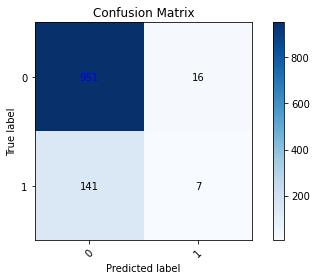

In [8]:
cnf_matrix_lr=confusion_matrix(y_test,pred_lr)
#print(cnf_matrix_lr)
plot_confusion_matrix(cnf_matrix_lr,[0,1],normalize=False,title="Confusion Matrix")

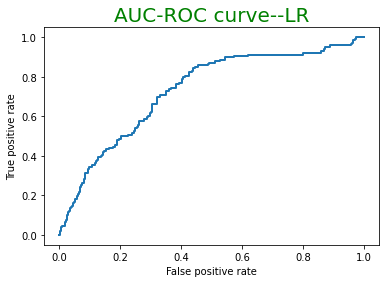

In [9]:
probs_lr= clf_lr.predict_proba(X_test)
probs_lr=probs_lr[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_lr)
plt.title("AUC-ROC curve--LR",color="green",fontsize=20)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linewidth=2, markersize=12)
plt.show()